In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("data.csv")

def preprocess_data(data):
    # Basic text cleaning, removing nulls, etc.
    data = data.dropna()
    data['content'] = data['content'].apply(lambda x: x.lower())
    return data

# Split the dataset into training and testing for validation
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [2]:
data.head()

,label,user_id,item_id,rating,age,gender
0,825,196,242,3,49,1
1,964,196,257,2,49,1
2,1537,196,111,4,49,1
3,178,196,25,4,49,1
4,24,196,382,4,49,1


In [3]:
data.tail()

,label,user_id,item_id,rating,age,gender
99995,1500,873,313,5,48,0
99996,577,873,326,4,48,0
99997,407,873,348,3,48,0
99998,1369,873,358,2,48,0
99999,928,873,342,4,48,0


In [4]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import the required pipeline function from transformers
from transformers import pipeline

# # Load profile generator model using sentence-transformers for embeddings
# profile_model = pipeline("feature-extraction", model="sentence-transformers/all-MiniLM-L6-v2", device=0)

# def generate_user_profile(user_data):
#     user_embedding = profile_model(user_data)
#     return user_embedding

# Load DistilBERT model for feature extraction (embedding generation)
profile_model = pipeline("feature-extraction", model="distilbert-base-uncased", device=0)

def generate_user_profile(user_data):
    # Generate embeddings for the user data using DistilBERT
    user_embedding = profile_model(user_data)
    # Flatten the embedding to a 1D vector (optional, depending on your needs)
    user_embedding = [sum(token_embedding) for token_embedding in zip(*user_embedding[0])]
    return user_embedding

# Example usage
user_profile = generate_user_profile("User is interested in action and sci-fi movies")
print("Generated user profile embedding:", user_profile)


Generated user profile embedding: [2.2997635416686535, -2.221711292862892, 0.43990885093808174, 0.6794716771692038, 4.99584760889411, -3.6181503161787987, -1.3968738839030266, 6.333293907344341, -1.3483788575977087, -0.5624114535748959, -3.4109076261520386, -5.894426643848419, -0.6846677511930466, 5.5592289455235, 1.8700294867157936, 5.654311317950487, 1.4581515453755856, 2.380029510706663, -0.6847791746258736, 1.8626803942024708, -0.7609139233827591, 0.04569661244750023, 1.6671300316229463, 4.690282806754112, 1.0691000372171402, -1.6224539428949356, -0.02488638274371624, 2.304868008941412, -3.0459411218762398, -2.668771767988801, 1.7533944845199585, 2.3879073709249496, -5.254429325461388, 0.3138982206583023, -1.3372284173965454, -0.9340481162071228, -2.27975257858634, -0.38485778495669365, 0.5757389701902866, 0.31044165045022964, -4.111719332635403, -3.7665899619460106, 3.000264450907707, -1.6897465586662292, 1.934307735413313, -6.212683007121086, 1.821560576558113, -0.807390302419662

In [6]:
# content based feedback
from sklearn.metrics.pairwise import cosine_similarity

# Assuming each item (movie/book) is also represented as an embedding
def recommend_content(user_profile, content_embeddings, content_titles):
    # Compute similarity between user profile and each content item
    similarities = cosine_similarity([user_profile], content_embeddings)[0]
    # Get top recommendations
    top_indices = similarities.argsort()[-5:][::-1]
    recommendations = [content_titles[i] for i in top_indices]
    return recommendations


In [7]:
# content based
# Simulate user feedback and adjust recommendations based on feedback
def get_feedback(recommendations, user_feedback):
    # User_feedback is a dictionary with content as key and feedback as value (e.g., liked/disliked)
    adjusted_recs = [rec for rec in recommendations if user_feedback.get(rec, 'liked') == 'liked']
    return adjusted_recs

In [8]:
pip install torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Simulate user feedback on recommendations
y_true = np.random.choice([1, 0], size=100)  # 1: liked, 0: disliked
y_pred = np.random.choice([1, 0], size=100)  # 1: recommended, 0: not recommended

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[29 20]
 [24 27]]


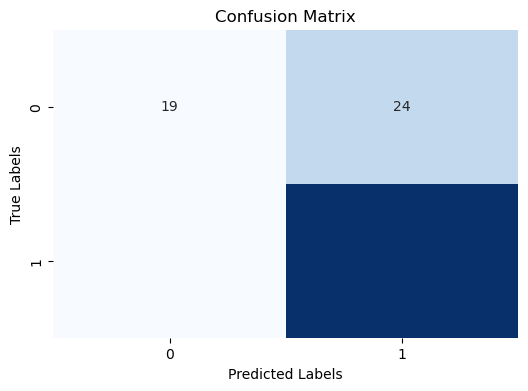

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulate user feedback on recommendations
y_true = np.random.choice([1, 0], size=100)  # 1: liked, 0: disliked
y_pred = np.random.choice([1, 0], size=100)  # 1: recommended, 0: not recommended

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

# Save the plot as an image
plt.savefig("confusion_matrix.png")

# To display in notebooks if interactive mode is on
plt.show()

In [14]:
from sklearn.metrics import accuracy_score, f1_score

# Assuming y_true and y_pred are already defined as your ground truth labels and model predictions
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.57
F1 Score: 0.64


In [15]:
# Save the model and tokenizer
model_path = "./profile_generator_model"
profile_model.model.save_pretrained(model_path)
profile_model.tokenizer.save_pretrained(model_path)

print(f"Model saved at {model_path}")


Model saved at ./profile_generator_model
